tm_130_2_1607105532-ABSjets-SN19173.log


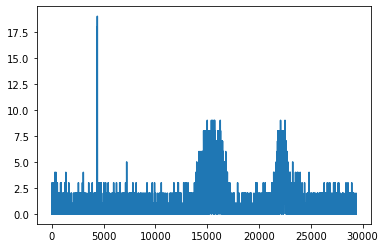

In [9]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

def main():
    filename = '/storage/experiments/2020/1204_ABSJets/Strip_detectors/tm_130_2_1607105532-ABSjets-SN19173.log' # write path to datalog
    basename = os.path.basename(filename)
    print(basename)
    
    layers = read_data(filename) # read data into list od DataFrames
    [top, second, third, bottom] = layers # now you can access the induvidual layers by its name (unzips the list called layers)
    
    top = particles(top) # run function particles on the top layer
    
    plot_particles(top)
    #plot_response(top, 30)
    

def read_data(filename):
    '''
    Reads data and puts them into pandas DataFrames - each layer has its own DataFrame
    '''

    out = []
    df = pd.read_csv(filename)
    aux_df = df.iloc[:, 0:7]
    aux_df.columns = ['date', 'time', 'unix', 'idk1', 'idk2', 'idk3', 'idk4']
    
    cols = np.linspace(1, 64, 64)
    cols = [str(int(x)) for x in cols]
    for i in range(4):
        df_layer = df.iloc[:, 7+64*i:7+64*(i+1)]
        df_layer.columns = cols
        df_layer = pd.concat([aux_df, df_layer], axis=1)
        out.append(df_layer)
    return out

def particles(df):
    '''
    Returns number of detected particles in a layer and saves it to a new column called 'particles' 
    '''
    
    df_data = df.loc[:, '1':'64'] # select only columns with data - without auxiliary information such as time, etc.
    df['particles'] = df_data.apply(count_clusters, axis=1) # run function count_layer on each row of the df_data DataFrame
    #print(df['particles'])
    return df
    
def count_clusters(row):
    '''
    Auxiliary function for function particle
    '''
    return len([list(x[1]) for x in itertools.groupby(row, lambda x: x == 0) if not x[0]]) # https://stackoverflow.com/questions/6760871

def plot_particles(df):
    '''
    Plots figure that shows number of particles as a function of time
    '''
    
    plt.plot(df['particles'])

def plot_response(df, strip):
    '''
    Plots figure that shows response of one strip of a layer during the whole measurement
    '''
    
    bins = np.linspace(0, 1000, 200) # create bins that are used for the response histogram
    data = df[str(strip)] # select correct column
    data = data[data!=0] # remove zeros - we do not care about zero responses
    
    plt.hist(data, bins=bins, histtype='step') # create histogram from data and with bins
    
main()